In [1]:
from chronos_utils import *

In [2]:
samples_local_path = 'mit-bih-arrhythmia-database-1.0.0'
observation_names = sorted(list(set([x[:-4] for x in os.listdir(samples_local_path) if (((x[0]=='2') | (x[0] == '1')) & (len(x) == 7))])))

In [19]:
save_dict = {}

for idx, filename_base in enumerate(observation_names):
    file_path = samples_local_path + '/' + filename_base

    try:
        MLII = create_record(filepath = file_path, column_subset=['MLII'])
        # randomly choose startpoint from between second 5 and the last 20 seconds
        start_sample_range = range(5*360, MLII.shape[0] - (20*360))
        np.random.seed(idx)
        random_start_selection = np.random.choice(start_sample_range, 121, replace=False)
        for number, random_start in enumerate(random_start_selection):
            MLII_subarray = MLII.iloc[random_start: random_start + (15*360 + 64)]

            MLII_quant = quantile_outlier_removal(MLII_subarray, column_name = 'MLII', quantile_min=0.00001, quantile_max = 0.99999)
            MLII_SMA = simple_moving_average(MLII_quant, 3)
            MLII_medfilt = median_filtering(MLII_SMA['MLII'],3)
            MLII_sos = sos_filter(MLII_medfilt)
            MLII_notch = notch_filtering(MLII_sos)
            final_df = normalizer(MLII_notch)
            save_dict.update({'a' + filename_base +'-'+ str(number) : final_df})

    except KeyError:
        print('KeyError for observation', filename_base, '- skipping this observation.')

np.savez_compressed('MIT-BIH.npz', **save_dict)

KeyError for observation 102 - skipping this observation.
KeyError for observation 104 - skipping this observation.


['a100-0', 'a100-1', 'a100-2', 'a100-3', 'a100-4', 'a100-5', 'a100-6', 'a100-7', 'a100-8', 'a100-9', 'a100-10', 'a100-11', 'a100-12', 'a100-13', 'a100-14', 'a100-15', 'a100-16', 'a100-17', 'a100-18', 'a100-19', 'a100-20', 'a100-21', 'a100-22', 'a100-23', 'a100-24', 'a100-25', 'a100-26', 'a100-27', 'a100-28', 'a100-29', 'a100-30', 'a100-31', 'a100-32', 'a100-33', 'a100-34', 'a100-35', 'a100-36', 'a100-37', 'a100-38', 'a100-39', 'a100-40', 'a100-41', 'a100-42', 'a100-43', 'a100-44', 'a100-45', 'a100-46', 'a100-47', 'a100-48', 'a100-49', 'a100-50', 'a100-51', 'a100-52', 'a100-53', 'a100-54', 'a100-55', 'a100-56', 'a100-57', 'a100-58', 'a100-59', 'a100-60', 'a100-61', 'a100-62', 'a100-63', 'a100-64', 'a100-65', 'a100-66', 'a100-67', 'a100-68', 'a100-69', 'a100-70', 'a100-71', 'a100-72', 'a100-73', 'a100-74', 'a100-75', 'a100-76', 'a100-77', 'a100-78', 'a100-79', 'a100-80', 'a100-81', 'a100-82', 'a100-83', 'a100-84', 'a100-85', 'a100-86', 'a100-87', 'a100-88', 'a100-89', 'a100-90', 'a100-91

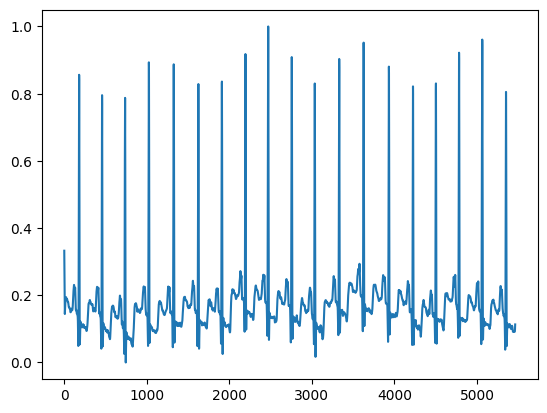

In [20]:
with np.load('MIT-BIH.npz') as data:
    print(data.files)
    a = data[data.files[7]]

plt.plot(range(len(a)),a)
